# Imports

In [11]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from hetanalysis import HetAnalysis
from clean import DrawPointAssayCleaner
import plotter

output_dir = "../outputs/het_analysis_wrt_time_dp/"
SAVE = True

plt.rcParams.update(
    {
        'font.size': 18
    }
)

# %matplotlib widget

# Data input and cleaning

In [12]:
df = DrawPointAssayCleaner.get_processed_data()

# Group and Output

## Group

In [13]:
dhids = list(df['dhid'].unique())
elements = [
    'CU',
    'AU'
]

igs, timeslices = {}, {}

for dhid in dhids:
    dp_timeslices = {} 

    filtered_df = df.query('dhid == @dhid').dropna(subset=elements).reset_index(drop=True)

    indices = filtered_df.index.to_list()

    dp_ig = {} # instantaneous grade
    for index in indices:
        date = filtered_df.iloc[index]['date']
        dp_timeslices[date] = {}
        
        for element in elements:
            if element not in dp_ig:
                dp_ig[element] = []
            
            dp_ig[element].append(filtered_df[element].loc[index])
            
            dp_timeslices[date][element] = HetAnalysis(
                f'{dhid}_{element}_{date}', 
                filtered_df['weight'].loc[:index], 
                filtered_df[element].loc[:index]
                )
    
    timeslices[dhid] = dp_timeslices
    igs[dhid] = dp_ig

## Output

/var/folders/_x/r7wxfm355p1dqy5lc636rn240000gn/T/ipykernel_19376/3418428540.py:24: UserWarning: Attempting to set identical left == right == 19293.0 results in singular transformations; automatically expanding.
  ax.set_xlim(min(d), max(d))
/var/folders/_x/r7wxfm355p1dqy5lc636rn240000gn/T/ipykernel_19376/3418428540.py:24: UserWarning: Attempting to set identical left == right == 19295.0 results in singular transformations; automatically expanding.
  ax.set_xlim(min(d), max(d))


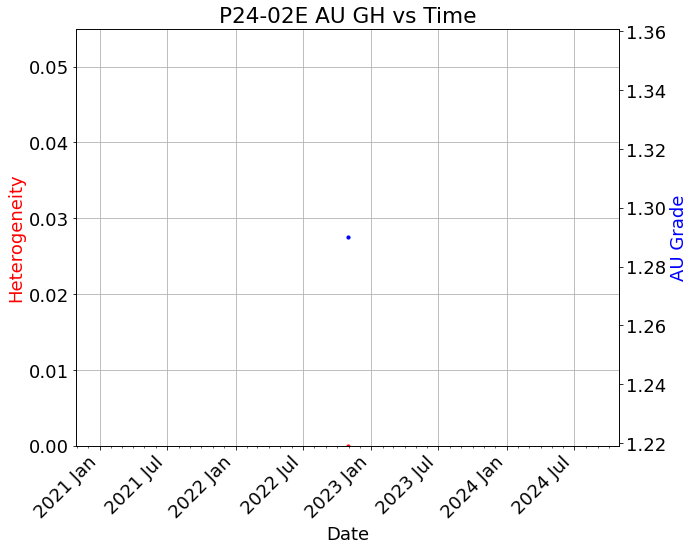

In [14]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(10, 8)


    for id, dp_timeslices in timeslices.items():
        save_loc = output_dir + f'{id}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)

        for element in elements:
            d, h, g = [], [], []
            for date, timeslice in dp_timeslices.items():
                d.append(date)
                h.append(timeslice[element].get_heterogeneity())
                g.append(timeslice[element].get_grade())
                
            fig.clear()
            
            ax = fig.add_subplot()
            sec_ax = ax.twinx()

            sec_ax.scatter(d, h, c='red', s=10)
            sec_ax.plot(d, h, alpha=0.6, c='red', ls='-')

            sec_ax.set_ylim(0)
            sec_ax.set_ylabel('Heterogeneity', c='red')
            
            ax.set_xlim(min(d), max(d))
            ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
            ax.xaxis.set_minor_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
            ax.set_xlabel('Date')

            for label in ax.get_xticklabels(which='major'):
                label.set(rotation=45, horizontalalignment='right')
            
            ig = igs[id]

            ax.plot(d, ig[element], alpha=0.3, c='blue', ls='-')
            ax.scatter(d, ig[element], c='blue', alpha=0.6, s=3)

            ax.plot(d, g, alpha=0.6, c='blue', ls='-')
            ax.scatter(d, g, c='blue', s=10)

            ax.set_ylabel(f'{element} Grade', c='blue')

            ax.set_title(f'{id} {element} GH vs Time')
            ax.grid()

            fig.tight_layout()
            fig.savefig(save_loc + f'{id}_{element}.svg', format='svg')

### Something else

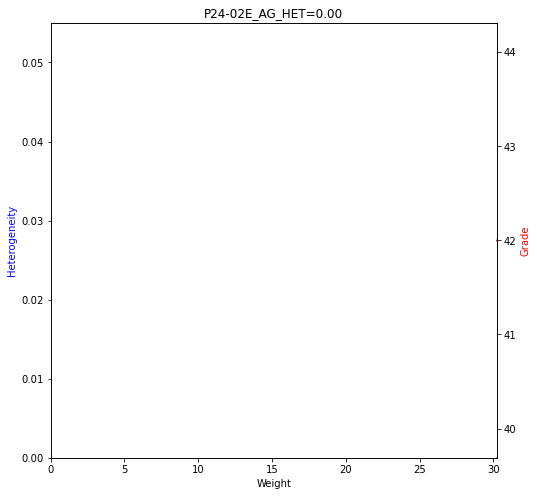

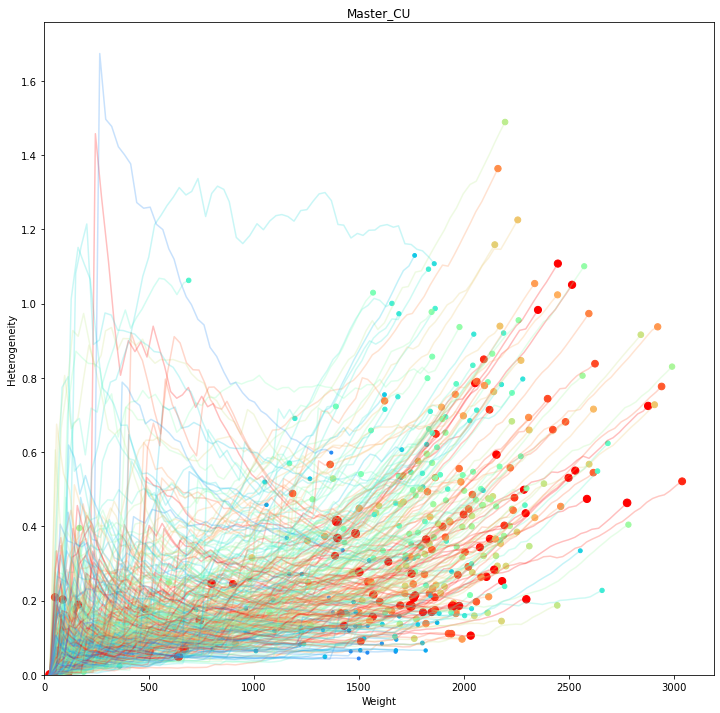

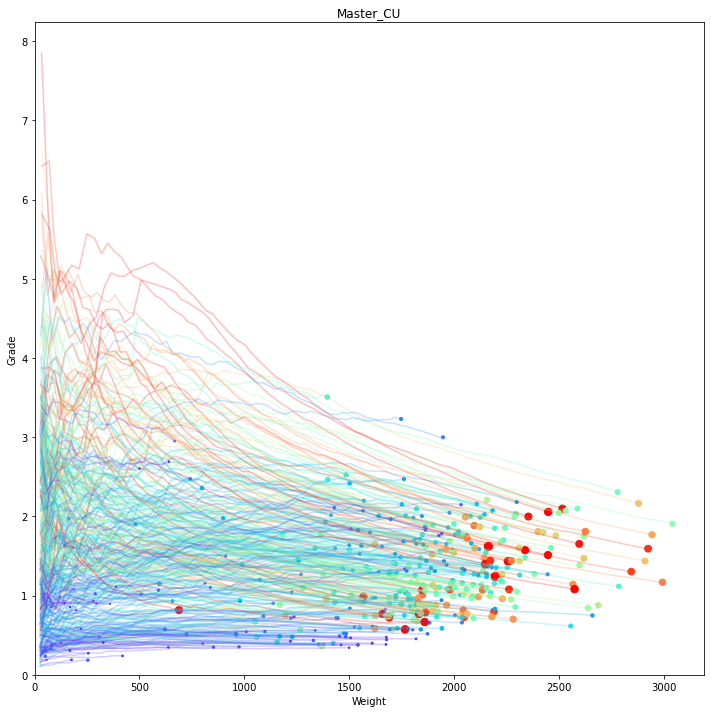

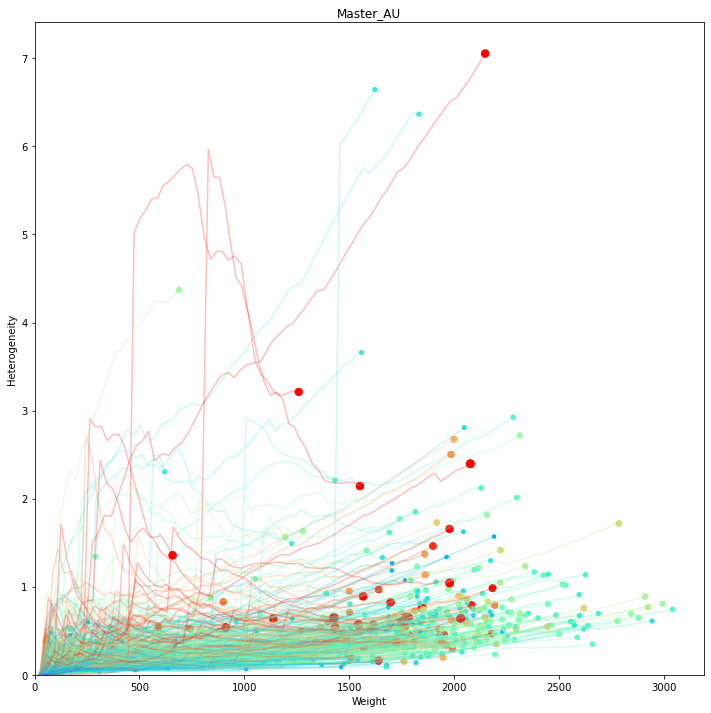

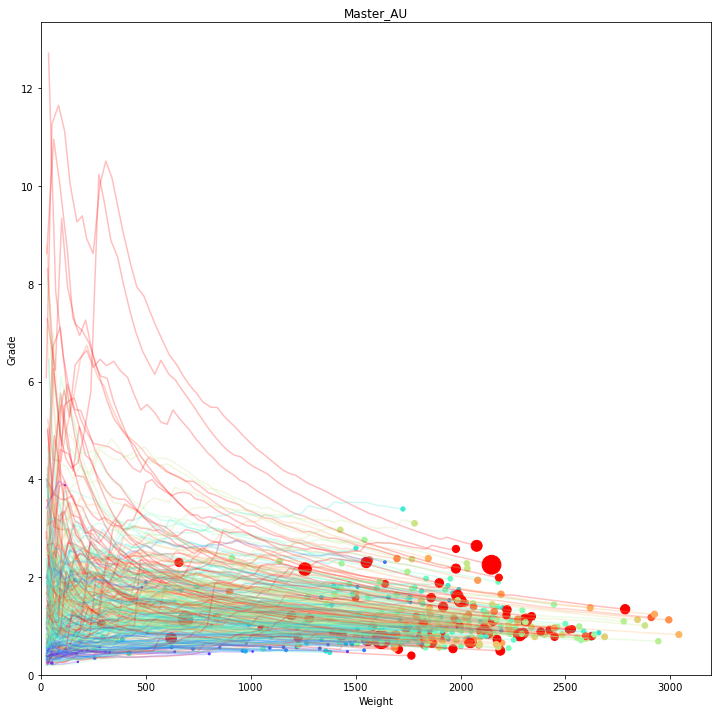

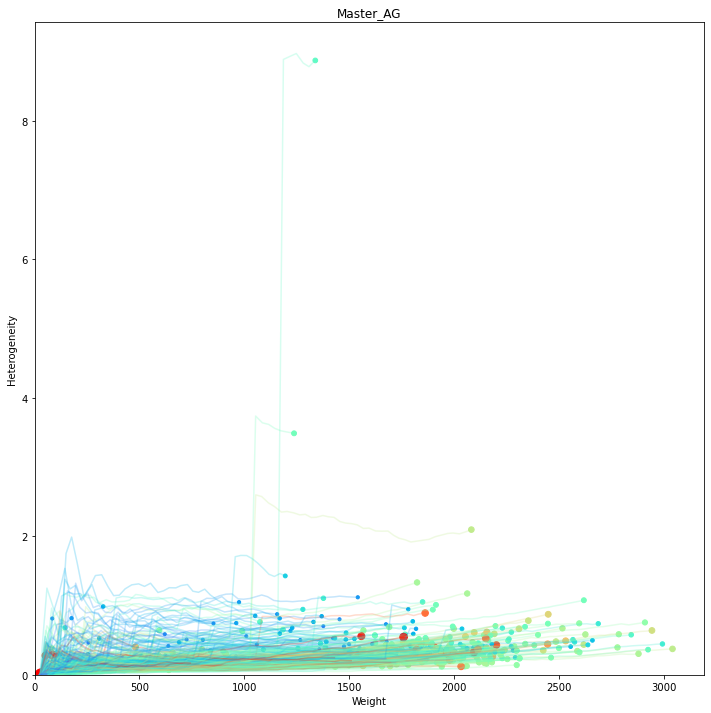

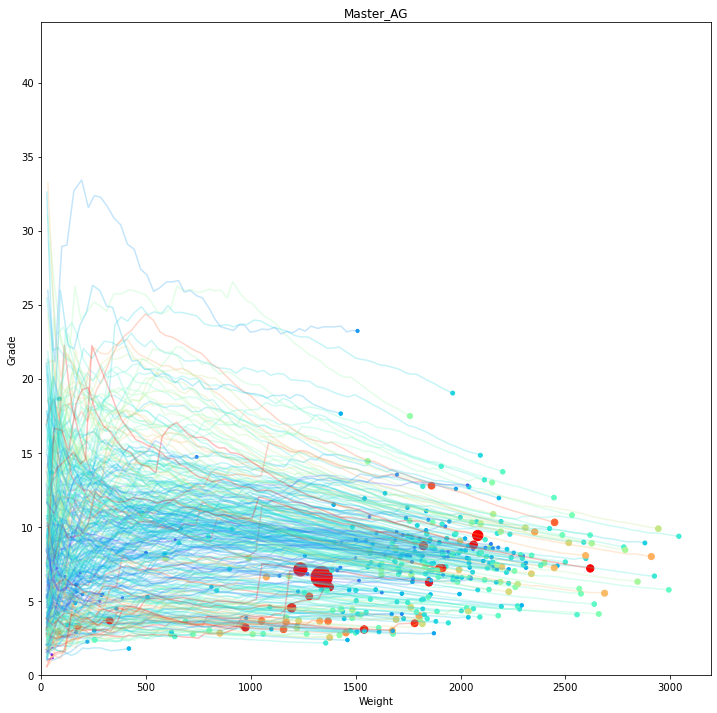

In [ ]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)
    
    s = 3
    alpha = 0.5
    
    ms = 0.5
    ma = 0.25
    
    cmap = plt.colormaps.get('rainbow')
    
    g_norm = {
        'CU': colors.Normalize(vmin=0.0, vmax=2.0),
        'AU': colors.Normalize(vmin=0.0, vmax=2.0),
        'AG': colors.Normalize(vmin=0.0, vmax=15.0)
    }
    
    h_norm = {
        'CU': colors.Normalize(vmin=0.0, vmax=1.0),
        'AU': colors.Normalize(vmin=0.0, vmax=1.0),
        'AG': colors.Normalize(vmin=0.0, vmax=1.0)
    }
    
    # g_norm = colors.Normalize(vmin=0.0, vmax=6.0)
    # h_norm = colors.Normalize(vmin=0.0, vmax=1.6)
    
    for element in elements:
        hw_master_fig = plt.figure()
        hw_master_fig.set_size_inches(12, 12)
        hw_master_ax = hw_master_fig.add_subplot()
        
        hw_master_ax.set_xlabel('Weight')
        hw_master_ax.set_ylabel('Heterogeneity')
        
        # hw_master_ax.set_facecolor('black')
        hw_master_ax.set_title(f'Master_{element}')
        
        gw_master_fig = plt.figure()
        gw_master_fig.set_size_inches(12, 12)
        gw_master_ax = gw_master_fig.add_subplot()
        
        gw_master_ax.set_xlabel('Weight')
        gw_master_ax.set_ylabel('Grade')
        
        # gw_master_ax.set_facecolor('lightgrey')
        gw_master_ax.set_title(f'Master_{element}')
        
        wf, hf, gf = [], [], []
        
        g_n = g_norm[element]
        h_n = h_norm[element]
        
        for dhid, dp_timeslices in groups.items():
            save_loc = output_dir + f'{dhid}/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            
            fig.clear()
            ax = fig.add_subplot()

            w, h, g = [], [], []
            for date, timeslice in dp_timeslices.items():
                if element in timeslice:
                    w.append(timeslice[element].get_cml_weight())
                    h.append(timeslice[element].get_heterogeneity())
                    g.append(timeslice[element].get_grade())
                    
            wf.append(w[-1])
            hf.append(h[-1])
            gf.append(g[-1])
            
            if len(w) > 0:
                ax.plot(w, h, alpha=alpha, c='red', ls='--')
                ax.scatter(w, h, c='red', s=s)

                ax.set_xlim(0, max(w))
                ax.set_xlabel('Weight')

                ax.set_ylim(0)
                ax.set_ylabel('Heterogeneity', c='red')

                sec_ax = ax.twinx()

                sec_ax.plot(w, g, alpha=alpha, c='blue', ls='--')
                sec_ax.scatter(w, g, c='blue', s=s)

                sec_ax.set_ylabel('Grade', c='blue')

                ax.set_title(f'{dhid}_{element}_HET={h[-1]:.2f}')
                fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')
                
                # Add to masters
                final_g = g[-1]
                hw_master_ax.plot(w, h, c=cmap(g_n(final_g)), alpha=ma)
                # hw_master_ax.scatter(w, h, c='black', s=ms, alpha=ma)
                
                final_h = h[-1]
                gw_master_ax.plot(w, g, c=cmap(h_n(final_h)), alpha=ma)
                # gw_master_ax.scatter(w, g, c='black', s=ms, alpha=ma)
                
        hw_master_ax.scatter(wf, hf, color=cmap(g_n(gf)), s=100*ms*g_n(gf))
        
        hw_master_ax.set_xlim(0)
        hw_master_ax.set_ylim(0)
        
        gw_master_ax.scatter(wf, gf, color=cmap(h_n(hf)), s=100*ms*h_n(hf))
        
        gw_master_ax.set_xlim(0)
        gw_master_ax.set_ylim(0)
    
        save_loc = output_dir + f'master/'    
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)      
        hw_master_fig.savefig(save_loc + f'hw_master_{element}.svg', format='svg')
        gw_master_fig.savefig(save_loc + f'gw_master_{element}.svg', format='svg')